In [11]:
from ctypes import sizeof
#from funciones_aureas import*
from msvcrt import kbhit
import os 
from os.path import isfile, join
from scipy.signal import savgol_filter
from scipy.signal import medfilt2d
import numpy as np
import scipy.io as sio
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import cv2
from scipy.io import wavfile
import numpy.matlib
from scipy import signal
from scipy.fft import fftshift
from Bioacustica_Com1 import time_and_date,segmentacion,seg_xie,fcc5
import soundfile as sf
from scipy import signal
from tkinter.filedialog import askdirectory

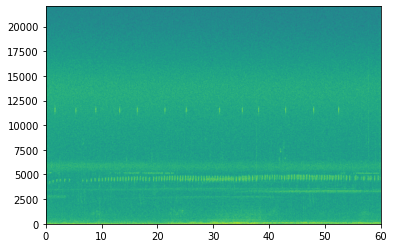

In [16]:
fs, senial = wavfile.read(r"D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audios\\JAGUAS253_20130117_075446.wav")
#fs, senial = wavfile.read(r"D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audio2\\JAGUAS260_20130131_110352.wav")
np.shape(senial.shape[:])[0]
if np.shape(senial.shape[:])[0] <2:
    p,f,t,d=plt.specgram(senial,Fs=fs,NFFT=2048,noverlap=1550)
else:
    intensity_matplotlib,f,t,d=plt.specgram(senial[:,1],Fs=fs,NFFT=2048,noverlap=1550)



In [13]:
import soundfile as sf
x, fs = sf.read(r"D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audios\\JAGUAS253_20130117_075446.wav")

if len(x.shape) == 1:
    senal_audio = x
else:
    x = x.mean(axis=1)
    x = np.squeeze(x)
    senal_audio = x

from scipy import signal
frecuency,time,intensity=signal.spectrogram(x,fs=fs,nfft=2048,nperseg=569,noverlap=0)

In [ ]:
#ruta=r"D:\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audios"
ruta = askdirectory(title = 'Seleccionar carpeta con audios')

archivos = os.listdir(ruta)
canal=1
autosel=0
visualize=0
banda=["min","max"]
print(ruta+"/"+archivos[1])
ruta2=ruta+"/"+archivos[1]
audios[0]


In [ ]:
fechas,cronologia,audios=time_and_date(ruta)

#####Funcion segmentacion########
# esta se programa dentro de primer for con i = 1
# se asume que el espectrograma genera los datos para s,f,t,p, los cuales son tomados de matlab
#y1 = data['y']  
banda=np.array(banda)
#p=0
segment_data=[]
contador_archivos=-1
nombre_archivo=[]
# Aqui se debe llamar la funcion del espectrograma.
for archivo in audios:
    contador_archivos=contador_archivos+1

    try:
        x, fs = sf.read(archivo)
    
        if len(x.shape) == 1:
            senal_audio = x
        else:
            x = x.mean(axis=1)
            x = np.squeeze(x)
            senal_audio = x
        #fs, senial = wavfile.read(archivo)
        #if np.shape(senial.shape[:])[0] <2:
        #    frecuency,time,intensity=signal.spectrogram(senial,fs=fs,nfft=2048,nperseg=569,noverlap=0)
        #else:
            #senial = senial.mean(axis=1)
            #senial = np.squeeze(senial)#Se promedian las 2 bandas para tener una sola, antes simplemente elegia 1 de ellas.
            #frecuency,time,intensity=signal.spectrogram(senial,fs=fs,nfft=2048,nperseg=569,noverlap=71)
        #    frecuency,time,intensity=signal.spectrogram(senial[:,1],fs=fs,nfft=2048,nperseg=569,noverlap=0)
        frecuency,time,intensity=signal.spectrogram(senal_audio,fs=fs,nfft=2048,nperseg=569,noverlap=0)
        segm_xie_band=np.empty((0,4),float)
        segmentos_nor_band=np.empty((0,4),float)

        s = np.abs(intensity)
        u, v = np.shape(s)
        #resiz=len(y1[:,canal])/len(s[1,:])
        band_1=1/u      # mirar si se usa para fmin
        band_2=1 
        #intensity,frecuency,time,d=plt.specgram(senial[:,1],Fs=fs,NFFT=2048,noverlap=1550)

        mfband = medfilt2d(s,kernel_size=(5,5))
        selband=np.flip(mfband,axis=0)

        #--------------------------  Xie ----------------------------------------
        if type(banda[1])==np.str_:
            banda=np.array([0,frecuency.max()])
        else:
            0
        segm_xie,segmentos_nor=seg_xie(intensity,time,frecuency)

        for k in range(len(segm_xie[:,1])):
            try:
                ti = np.array(segm_xie[k,0]) #tiempo inicial (X)
                tf =np.array(segm_xie[k,1])   #tiempo final(X+W)
                fi = np.array(segm_xie[k,3])    #frecuencia inicial (Y)
                fff = np.array(segm_xie[k,2])    # frecuencia final (Y+H)
                
                if fi>=banda[0] and fff <= banda[1]:
                    segm_xie_band=np.append(segm_xie_band, np.expand_dims(np.array([segm_xie[k,0],segm_xie[k,1],segm_xie[k,2],segm_xie[k,3]]),axis=0), axis=0)
                    segmentos_nor_band=np.append(segmentos_nor_band, np.expand_dims(np.array([segmentos_nor[k,0],segmentos_nor[k,1],segmentos_nor[k,2],segmentos_nor[k,3]]),axis=0), axis=0)     
            except:
                0

        segm_xie = segm_xie_band
        segmentos_nor=segmentos_nor_band

        k=0
        for k in range(len(segm_xie[:,1])): 
            try:
                ti = np.array(segm_xie[k, 0])    # tiempo inicial (X)
                tf =np.array(segm_xie[k,1])      #tiempo final(X+W)
                fi = np.array(segm_xie[k,3])     #frecuencia inicial (Y)
                fff = np.array(segm_xie[k,2])    # frecuencia final (Y+H)
                        
                x=np.array(segmentos_nor[k,0])+1                  #tiempo inicial (X)
                xplusw =segmentos_nor[k,0] + segmentos_nor[k,2]   #Tiempo final(X+W)
                y = segmentos_nor[k,1]+1                          #frecuencia inicial (Y)
                yplush = segmentos_nor[k,1] + segmentos_nor[k,3]  #frecuencia final (Y+H)
                seg = np.array(selband[int(y-1):int(yplush),int(x-1):int(xplusw)])
                nfrec = 4
                div= 4
                nfiltros=14 # se cambia porque con 30 se pierden muchos cantos
                features= fcc5(seg,nfiltros,div,nfrec) #50 caracteristicas FCCs

                fseg,cseg=np.shape(seg)
                seg=( (seg-(np.matlib.repmat((np.min(np.real(seg[:]))),fseg,cseg))) 
                    / ((np.matlib.repmat((np.max(np.real(seg[:]))),fseg,cseg))
                    -(np.matlib.repmat((np.min(np.real(seg[:]))),fseg,cseg))))

                sum_domin=np.transpose(np.expand_dims(np.sum(seg,1),axis=0)) #cambio frecuencia dominante
                        
                dummy,dom = (np.max(np.real(np.transpose(np.expand_dims(savgol_filter(np.ravel(sum_domin)
                            ,1,0),axis=0))))), np.argmax(savgol_filter(np.ravel(sum_domin),1,0))
                
                dom=((((fi*u/(fs/2))+dom)/u)*fs/2) #frecuencia dominante

                dfcc = np.diff(features,1)
                dfcc2 = np.diff(features,2)
                cf = np.cov(features)
                ff = []
                for r in range(len(features[:,0])-1): 
                    ff = np.append(ff,np.diag(cf),axis=0)

                #transforma la matriz en un vector tipo columna
                features = np.expand_dims(features.flatten(order='F'),axis=0)
                #se agregan los resultados de dffcc y dffc2 a features
                features= np.append(features,np.concatenate((np.expand_dims(np.mean(dfcc,1),axis=0),np.expand_dims(np.mean(dfcc2,1),axis=0)),axis=1),axis=1)
                features = np.transpose(features)

                if tf>ti and fff>fi:

                    lista_aux1=[np.int16(fechas.T[0,2:6])]
                    lista_aux1=np.array(lista_aux1)
                    lista_aux2=np.concatenate((np.expand_dims(ti,axis=0),np.expand_dims(tf,axis=0),np.expand_dims(tf-ti,axis=0),
                                            np.expand_dims(dom,axis=0),np.expand_dims(fi,axis=0),np.expand_dims(fff,axis=0),
                                            np.expand_dims(band_1,axis=0),np.expand_dims(band_2,axis=0)))
                    lista_aux2=np.array(lista_aux2)
                    lista_aux3=np.append(lista_aux1,lista_aux2)
                    lista_aux4=np.append(lista_aux3,features.T)

                    segment_data.append(lista_aux4)
                    nombre_archivo.append(fechas[0,contador_archivos])
                    
                else:
                    0
            except:
                0
        segment_data=np.array(segment_data)
        nombre_archivo=np.array(nombre_archivo)
        nombre_archivo=np.expand_dims(nombre_archivo,axis=1)
    except RuntimeError:
        print("error en grabacion:",archivo )

In [ ]:

np.shape(senial.shape[:])[0]
if np.shape(senial.shape[:])[0] <2:
    senial=senial.reshape(senial.shape[0],1)
    senial=np.concatenate((senial,senial),axis=1)
    

In [ ]:
fs, senial = wavfile.read(r"D:\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audiosmitad\JAGUAS253_20121114_080107.wav")
frecuency,time,intensity=signal.spectrogram(senial[:,1],fs=fs,nfft=2048,nperseg=569,noverlap=71)
s = np.abs(intensity)
u, v = np.shape(s)

In [ ]:
#frecuency,time,intensity=signal.spectrogram(senial[:,1],fs=muestra,nfft=2048,detrend=false, nperseg=569,noverlap=71)
NFFT=2048
f,t,Sxx = signal.spectrogram(senial[:,1],fs=fs,detrend = False,nfft=2048,window = signal.windows.hann(NFFT),noverlap=1550)
g=10*np.log10(Sxx)

In [ ]:
Sxx_to_Pxx_dB = 10*np.log10(Sxx/p)
print(f'largest difference: {np.abs(Sxx_to_Pxx_dB).max():4.3G}')
print(f'minimum difference: {np.abs(Sxx_to_Pxx_dB).min():4.3G}')
print(f'mean difference: {np.abs(Sxx_to_Pxx_dB).mean():4.3G}')

In [ ]:
#ruta='D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audiosmitad'
ruta=r'D:\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audios'
count=0
#ruta.replace("\\","/")
nombres = os.listdir(ruta)

In [ ]:
r=np.expand_dims(f,axis=1)
g=np.expand_dims(t,axis=0)
banda=np.array([2500,3000])

In [ ]:
tiempo=sio.loadmat("D:\Proyectos Visual Studio\Python-Jupyther\Bioacustica\Variables\Tiempo.mat")
tiempo=tiempo["T"]
frecuencia=sio.loadmat("D:\Proyectos Visual Studio\Python-Jupyther\Bioacustica\Variables\Frecuencia.mat")
frecuencia=frecuencia["F"]

In [ ]:
cronologia={"Grabacion #":[],"Formato Grabacion":[],
            "Año":[],"Mes":[],"Dia":[],
            "Hora":[],"Minuto":[],"Segundo":[]}

audios=[]
fechas=[]
s=0
for name in nombres:
    s=s+1
    direccion=ruta+"/"+name
    identify_1=name.find("wav")
    identify_2=name.find("mp3")
    if identify_1 !=-1 or identify_2 !=-1:
        audios.append(direccion)
        datos=name.split("_")
        if len(datos) > 2 :
            cronologia["Formato Grabacion"].append(datos[0])
            cronologia["Año"].append(datos[1][0:4])
            cronologia["Mes"].append(datos[1][4:6])
            cronologia["Dia"].append(datos[1][6:8])
            cronologia["Hora"].append(datos[2][0:2])
            cronologia["Minuto"].append(datos[2][2:4])
            cronologia["Segundo"].append(datos[2][4:6])
            cronologia["Grabacion #"].append(s)
        else:
            cronologia["Formato Grabacion"].append(name)
            cronologia["Año"].append("nan")
            cronologia["Mes"].append("nan")
            cronologia["Dia"].append("nan")
            cronologia["Hora"].append("nan")
            cronologia["Minuto"].append("nan")
            cronologia["Segundo"].append("nan")
            cronologia["Grabacion #"].append(s)
            
    else:
        0
fechas.append(cronologia["Formato Grabacion"])
fechas.append(cronologia["Año"])
fechas.append(cronologia["Mes"])
fechas.append(cronologia["Dia"])
fechas.append(cronologia["Hora"])
fechas.append(cronologia["Minuto"])
fechas.append(cronologia["Segundo"])
fechas=np.array(fechas)





In [ ]:
def fcc5(canto,nfiltros,nc,nframes):    
    """Calculo de FCCs con escalamiento lineal, hace parta de los MFCC 
    (Coeﬁcientes Cepstrales en las Frecuencias de Mel), son coeficientes para la
    representacion del habla basado en la persepcion humana.

    Args:
        canto (_type_): _description_
        nfiltros (_type_): _description_
        nc (_type_): _description_
        nframes (_type_): _description_

    Returns:
        _type_: _description_
    """

    
   # nfiltros = 14
    #nc = 4
    #nframes = 4
    #I11 = sio.loadmat('MCanto.mat')
    #canto = I11['canto']
    a, b = np.shape(canto)
    div = nframes
    w = int(np.floor(b/div))
    b1 = np.empty((a, 0), float)
    for k in range(0, w*div, w):
        bb = np.transpose(np.expand_dims(np.sum(np.power
             (np.abs(canto[:, k:k + w]), 2), axis=1), axis=0))
        b1 = np.append(b1, bb, axis=1)

    if a >= nfiltros:
        _h = np.zeros((nfiltros, a), np.double)
        wf = int(np.floor(a/nfiltros))
        h = np.empty((0, a), float)
        for k in range(0, wf*nfiltros, wf):
            hh = np.expand_dims(fuzz.gaussmf
                 (np.arange(a) + 1, k + wf, wf/4), axis=0)
            h= np.append(h, hh, axis=0)
    fbe = h@b1
    n = nc
    m = nfiltros

    dctm = lambda n, m: np.multiply(np.sqrt(2/m),
           np.cos(np.multiply(np.matlib.repmat
           (np.transpose(np.expand_dims
           (np.arange(n), axis=0)), 1, m),
           np.matlib.repmat(np.expand_dims
           (np.multiply(np.pi, np.arange
           (1, m + 1)-0.5)/m, axis=0), n, 1))))
    dct = dctm(n, m)
    y = dct@np.log(fbe)
    return y

def without_subband_mode_intensities(I1):
    """Adecua la matris de un espectrograma 

    Args:
        I1 (Array): _description_

    Returns:
        _type_: _description_
    """
    M, N = np.shape(I1)
    I2 = np.zeros((M, N), np.double)
    mode1 = np.zeros((1, M), np.double)

    nf = 0
    for nf in range(0, M):
        thisi = I1[nf, :]
        thisi[thisi == np.inf] = np.nan

        maxi = np.max(np.real(thisi[:]))

        mini = np.min(np.real(thisi[:]))

        threshi = np.abs((mini-maxi)/2)

        hvec = np.arange(np.min(np.real(thisi[:])), np.max(np.real(thisi[:])))
        if np.size(hvec) == 1:
            hvec = np.expand_dims(np.linspace(mini, maxi, 2), axis=0)

        histii = np.object_(np.histogram(thisi[:], hvec))
        #histii,bins = np.histogram(thisi[:], hvec)
        #histii = np.real(histii)
        histi = histii[0]

        loc = np.argmax(histi[:])

        mode1_tmp = hvec[loc]
        mode1[0, nf] = mode1_tmp

    # Filtro de promedio Movil
    mode2 = savgol_filter(mode1, 11, 1)
    mode2 = np.transpose(mode2)

    for nf in range(0, M):
        I2[nf, :] = I1[nf, :]-mode2[nf]
    return I2

def findeccentricity (ellipse):

    """
    Determina el valor de la exentricdad de una elipse para saber su morfologica.
    Si es cero es un circulo, si es 1 se aproxima a una linea

    Inputs:
        Elipse: corresponde a la elipse a realizar extraida de opencv
    Returns:
        eccentricity (float): Retorna el valor de la exentricidad de la elipse analizada
    """
    secelip_1=ellipse[1][0]
    secelip_2=ellipse[1][1]
    if secelip_1>secelip_2:
        elip_a=secelip_1
        elip_b=secelip_2
    else:
        elip_a=secelip_2
        elip_b=secelip_1

    elip_c=np.sqrt((elip_a**2)-(elip_b**2))
    eccentricity=elip_c/elip_a
    return eccentricity

def seg_xie(intensityi,specgram_time,specgram_frecuency):
    """Realiza en analisis de los elementos de mayor intensidad en el espectrograma para encontrar
    el tiempo y frecuencia maxima y minima de los elementos mas representativos del audio seleccionado

    Args:
        intensity (array): la variable spectrum, salida de la funcion specgram de matplotlib
        es una arreglo 2D que indica las intensidades sonoras del audio analizado.

        specgram_time (array): Es un arreglo de una dimension que indica el rango de tiempo que
        ocupa cada pixel en el espectrograma, es la salida "t" de la funcion specgram.

        specgram_frecuency (array): es un arreglo 1D que indica el rango de frecuencias que 
        ocupa cada pixel en el spectrograma, es la salida "f" de la funcion specgram.


    Returns:
        segm_xie (array): Arreglo que pose el tiempo y frecuencia minima y maxima de cada
        elemento encontrado. 
        Ejemplo: [tiempo_inicial,tiempo_final,frecuencia_inicial,frecuencia_final]

        segmentos_nor (array): Arreglo que pose la informacion de segm_xie, pero como
        posicion en el arreglo 2 otorgando el punto inicial y el ancho y alto del elemento. 
        Ejemplo: [posicion_x,posicion_y,ancho,alto]
    """
    specgram_time=np.expand_dims(specgram_time,axis=0)
    specgram_frecuency=np.expand_dims(specgram_frecuency,axis=1)
    specgram_frecuency=np.flipud(specgram_frecuency)
    intensity=intensityi[1:,:]
    spectgram_intensity=20*(np.log10(np.abs(intensity)))#funcion para pasar a desibelios. 
    gauss_intensity = cv2.GaussianBlur(spectgram_intensity,(13,13),sigmaX=2,sigmaY=5)#se utiliza un filtro gausiano. 

    with_suband=without_subband_mode_intensities(gauss_intensity)

    with_suband = with_suband * (with_suband>=0)

    cv2.imwrite("seg_xie.png",with_suband) #guardo la imagen ya que no se puede manipular directamente.

    with_suband=cv2.imread("seg_xie.png",0) #la abro para pocerder con el programa, debo buscar una mejor solucion.
    #with_suband=np.abs(with_suband)
    _,wsub_binarized = cv2.threshold(with_suband, 0, 255,type =cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    wsub_binarized=np.flipud(wsub_binarized) #se binariza con un filtro adaptativo y se invierte

    rectang_Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(7, 9)) #creo el kernel rectangular para la operacion de opening
    morf_opening = cv2.morphologyEx(wsub_binarized, cv2.MORPH_OPEN, rectang_Kernel, iterations=1)
    cuad_Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(6, 6)) #kernel para el Closening
    morf_close = cv2.morphologyEx(morf_opening, cv2.MORPH_CLOSE, cuad_Kernel, iterations=1)

    spectgram_contours, hierarchy = cv2.findContours(morf_close,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #encuentro todos los grupos de pixeles blancos unidos
    spectgram_estructures=[]

    #filtrando los contornos de acuerdo a su tamaño, area en bounding box y morfologia de la ecentricidad(si es circulo o linea)
    for cnt in spectgram_contours:
        x,y,w,h = cv2.boundingRect(cnt) #encontrando la bounding box del elemento
        area=cv2.contourArea(cnt) #encontrando su area
        exent=area/(w*h)
        if area>200 and area<40000 and exent>0.3:
            ellipse = cv2.fitEllipse(cnt) #me da los elemetos que componen una elipse
            eccentricity=findeccentricity(ellipse) #uso una funcion que cree para encontrar la exentricidad del elemento

            if eccentricity>0.5:
                spectgram_estructures.append(cnt)  #guardo los elementos que pasan la condicion
        else:
            continue

    segment=[] #Arreglo que pose el tiempo y frecuencia minima y maxima.
    segmentos_nor=[] #pose lo mismo que el anterior pero da la posicion en pixeles
    for element in spectgram_estructures:
        timeI,frecma,duration,magfrec=cv2.boundingRect(element)
        posicion=[int(timeI),int(frecma),int(duration),int(magfrec)]
        segment.append([float(specgram_time[:,(posicion[0]+1)]),float(specgram_time[:,(posicion[0]+posicion[2]-1)]),
        float(specgram_frecuency[(posicion[1]+1),:]),float(specgram_frecuency[(posicion[1]+posicion[3]),:])])
        segmentos_nor.append([posicion[0],posicion[1],posicion[2],posicion[3]])
    segm_xie=np.array(segment)
    segmentos_nor=np.array(segmentos_nor)

    return segm_xie,segmentos_nor

def time_and_date(dir):
    """
    Regresa una lista con las direcciones de cada audio en la carpeta seleccionada asi mismo la fecha
    y hora en la que fue tomado el audio y los devuelve como lista o como diccionario. 

    Args:
        dir (array): Direccion de la carpeta en la que se encuentran los audios a procesar. 

    Returns:
        fechas (array): Devuelve un arreglo en la que cada columna contiene la fecha
        y hora de un audio con el formato requerido.

        cronologia (array): Devuelve lo mismo que fechas pero en un diccionario.

        audios (array): Devuelve la direccion de cada audio encontrado en la carpeta seleccionada.
        
    """
    nombres = os.listdir(dir)
    cronologia={"nombre_archivo":[],
                "Año":[],"Mes":[],"Dia":[],
                "Hora":[],"Minuto":[],"Segundo":[]}

    audios=[]
    fechas=[]

    for name in nombres:
        direccion=dir+"/"+name
        identify_1=name.find("wav")
        identify_2=name.find("mp3")
        if identify_1 !=-1 or identify_2 !=-1:
            audios.append(direccion)
            datos=name.split("_")
            if len(datos) > 2 :
                cronologia["nombre_archivo"].append(name)
                cronologia["Año"].append(datos[1][0:4])
                cronologia["Mes"].append(datos[1][4:6])
                cronologia["Dia"].append(datos[1][6:8])
                cronologia["Hora"].append(datos[2][0:2])
                cronologia["Minuto"].append(datos[2][2:4])
                cronologia["Segundo"].append(datos[2][4:6])
            else:
                cronologia["nombre_archivo"].append(name)
                cronologia["Año"].append("nan")
                cronologia["Mes"].append("nan")
                cronologia["Dia"].append("nan")
                cronologia["Hora"].append("nan")
                cronologia["Minuto"].append("nan")
                cronologia["Segundo"].append("nan")
                
        else:
            0
    fechas.append(cronologia["nombre_archivo"])
    fechas.append(cronologia["Año"])
    fechas.append(cronologia["Mes"])
    fechas.append(cronologia["Dia"])
    fechas.append(cronologia["Hora"])
    fechas.append(cronologia["Minuto"])
    fechas.append(cronologia["Segundo"])
    fechas=np.array(fechas)

    return fechas,cronologia,audios

In [ ]:
fechas,cronologia,audios=time_and_date("D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audio1")

#####Funcion segmentacion########
# esta se programa dentro de primer for con i = 1
# se asume que el espectrograma genera los datos para s,f,t,p, los cuales son tomados de matlab
data = sio.loadmat('D:\Proyectos Visual Studio\Python-Jupyther\Bioacustica\Variables\Pspectro.mat')
s = data['s']
y1 = data['y']  
banda=np.array([2500,20000])
canal=1
s = np.abs(s)
u, v = np.shape(s)
resiz=len(y1[:,canal])/len(s[1,:])
band_1=1/u      # mirar si se usa para fmin
band_2=1        # mirar si se usa para fmax
p=0
contador_archivos=-1
segment_data=[]
segm_xie_band=np.empty((0,4),float)
segmentos_nor_band=np.empty((0,4),float)
nombre_archivo=[]

# Aqui se debe llamar la funcion del espectrograma.

for archivo in audios:
    contador_archivos=contador_archivos+1

    muestra, fs = wavfile.read(archivo)
    intensity,frecuency,time,d=plt.specgram(fs[:,1],Fs=muestra,NFFT=2048,noverlap=1550)
    
    

    mfband = medfilt2d(s,kernel_size=(5,5))
    selband=np.flip(mfband,axis=0)

    #--------------------------  Xie ----------------------------------------
    
    segm_xie,segmentos_nor=seg_xie(intensity,time,frecuency)

    for k in range(len(segm_xie[:,1])):
        try:
            ti = np.array(segm_xie[k,0]) #tiempo inicial (X)
            tf =np.array(segm_xie[k,1])   #tiempo final(X+W)
            fi = np.array(segm_xie[k,3])    #frecuencia inicial (Y)
            fff = np.array(segm_xie[k,2])    # frecuencia final (Y+H)
            
            if (fi>=banda[0]) and (fff <= banda[1]):
                segm_xie_band=np.append(segm_xie_band, np.expand_dims(np.array([segm_xie[k,0],segm_xie[k,1],segm_xie[k,2],segm_xie[k,3]]),axis=0), axis=0)
                segmentos_nor_band=np.append(segmentos_nor_band, np.expand_dims(np.array([segmentos_nor[k,0],segmentos_nor[k,1],segmentos_nor[k,2],segmentos_nor[k,3]]),axis=0), axis=0)     
        except:
            segmentos_nor_band=np.append(segmentos_nor_band, np.expand_dims(np.array([segmentos_nor[k,0],segmentos_nor[k,1],segmentos_nor[k,2],segmentos_nor[k,3]]),axis=0), axis=0)
            print()

    segm_xie = segm_xie_band
    segmentos_nor=segmentos_nor_band

    k=0
    for k in range(len(segm_xie[:,1])): 
        try:
            ti = np.array(segm_xie[k, 0])    # tiempo inicial (X)
            tf =np.array(segm_xie[k,1])      #tiempo final(X+W)
            fi = np.array(segm_xie[k,3])     #frecuencia inicial (Y)
            fff = np.array(segm_xie[k,2])    # frecuencia final (Y+H)
                    
            x=np.array(segmentos_nor[k,0])+1                  #tiempo inicial (X)
            xplusw =segmentos_nor[k,0] + segmentos_nor[k,2]   #Tiempo final(X+W)
            y = segmentos_nor[k,1]+1                          #frecuencia inicial (Y)
            yplush = segmentos_nor[k,1] + segmentos_nor[k,3]  #frecuencia final (Y+H)
            seg = np.array(selband[int(y-1):int(yplush),int(x-1):int(xplusw)])
            nfrec = 4
            div= 4
            nfiltros=14 # se cambia porque con 30 se pierden muchos cantos
            features= fcc5(seg,nfiltros,div,nfrec) #50 caracteristicas FCCs

            fseg,cseg=np.shape(seg)
            seg=( (seg-(np.matlib.repmat((np.min(np.real(seg[:]))),fseg,cseg))) 
                / ((np.matlib.repmat((np.max(np.real(seg[:]))),fseg,cseg))
                -(np.matlib.repmat((np.min(np.real(seg[:]))),fseg,cseg))))

            sum_domin=np.transpose(np.expand_dims(np.sum(seg,1),axis=0)) #cambio frecuencia dominante
                    
            dummy,dom = (np.max(np.real(np.transpose(np.expand_dims(savgol_filter(np.ravel(sum_domin)
                        ,1,0),axis=0))))), np.argmax(savgol_filter(np.ravel(sum_domin),1,0))
            
            dom=((((fi*u/(fs/2))+dom)/u)*fs/2) #frecuencia dominante
            print(dom)

            dfcc = np.diff(features,1)
            dfcc2 = np.diff(features,2)
            cf = np.cov(features)
            ff = []
            for r in range(len(features[:,0])-1): 
                ff = np.append(ff,np.diag(cf),axis=0)

            features = np.expand_dims(features.flatten(order='F'),axis=0)
            #se agregan los resultados de dffcc y dffc2 a features
            features= np.append(features,np.concatenate((np.expand_dims(np.mean(dfcc,1),axis=0),np.expand_dims(np.mean(dfcc2,1),axis=0)),axis=1),axis=1)
            features = np.transpose(features)
                
            if tf>ti and fff>fi:
                lista_aux1=[np.int16(fechas.T[0,2:6])]
                lista_aux1=np.array(lista_aux1)
                lista_aux2=np.concatenate((np.expand_dims(ti,axis=0),np.expand_dims(tf,axis=0),np.expand_dims(tf-ti,axis=0),
                                           np.expand_dims(dom,axis=0),np.expand_dims(fi,axis=0),np.expand_dims(fff,axis=0),
                                           np.expand_dims(band_1,axis=0),np.expand_dims(band_2,axis=0)))
                lista_aux2=np.array(lista_aux2)
                lista_aux3=np.append(lista_aux1,lista_aux2)
                lista_aux4=np.append(lista_aux3,features.T)

                segment_data.append(lista_aux4)
                nombre_archivo.append(fechas[0,contador_archivos])

        except:
            0
segment_data=np.array(segment_data)
nombre_archivo=np.array(nombre_archivo)



In [ ]:

muestra, fs = wavfile.read("D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audiosmitad/JAGUAS253_20121114_081107.wav")
intensity,frecuency,time,d=plt.specgram(fs[:,1],Fs=muestra,NFFT=2048,noverlap=1550)

intensityi=intensity
specgram_time=time
specgram_frecuency=frecuency


specgram_time=np.expand_dims(specgram_time,axis=0)
specgram_frecuency=np.expand_dims(specgram_frecuency,axis=1)
intensity=intensityi[1:,:]
spectgram_intensity=20*(np.log10(np.abs(intensity)))#funcion para pasar a desibelios. 
gauss_intensity = cv2.GaussianBlur(spectgram_intensity,(13,13),sigmaX=2,sigmaY=5)#se utiliza un filtro gausiano. 

with_suband=without_subband_mode_intensities(gauss_intensity)

with_suband = with_suband * (with_suband>=0)

cv2.imwrite("Anda2.png",with_suband) #guardo la imagen ya que no se puede manipular directamente.

with_suband=cv2.imread("Anda2.png",0) #la abro para pocerder con el programa, debo buscar una mejor solucion.
#with_suband=np.abs(with_suband)
_,wsub_binarized = cv2.threshold(with_suband, 0, 255,type =cv2.THRESH_BINARY+cv2.THRESH_OTSU)
wsub_binarized=np.flipud(wsub_binarized) #se binariza con un filtro adaptativo y se invierte

rectang_Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(7, 9)) #creo el kernel rectangular para la operacion de opening
morf_opening = cv2.morphologyEx(wsub_binarized, cv2.MORPH_OPEN, rectang_Kernel, iterations=1)
cuad_Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(6, 6)) #kernel para el Closening
morf_close = cv2.morphologyEx(morf_opening, cv2.MORPH_CLOSE, cuad_Kernel, iterations=1)

spectgram_contours, hierarchy = cv2.findContours(morf_close,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #encuentro todos los grupos de pixeles blancos unidos
spectgram_estructures=[]

#filtrando los contornos de acuerdo a su tamaño, area en bounding box y morfologia de la ecentricidad(si es circulo o linea)
for cnt in spectgram_contours:
    x,y,w,h = cv2.boundingRect(cnt) #encontrando la bounding box del elemento
    area=cv2.contourArea(cnt) #encontrando su area
    exent=area/(w*h)
    if area>200 and area<40000 and exent>0.3:
        ellipse = cv2.fitEllipse(cnt) #me da los elemetos que componen una elipse
        eccentricity=findeccentricity(ellipse) #uso una funcion que cree para encontrar la exentricidad del elemento

        if eccentricity>0.5:
            spectgram_estructures.append(cnt)  #guardo los elementos que pasan la condicion
    else:
        continue

segment=[] #Arreglo que pose el tiempo y frecuencia minima y maxima.
segmentos_nor=[] #pose lo mismo que el anterior pero da la posicion en pixeles
for element in spectgram_estructures:
    timeI,frecma,duration,magfrec=cv2.boundingRect(element)
    posicion=[int(timeI),int(frecma),int(duration),int(magfrec)]
    segment.append([float(specgram_time[:,(posicion[0]+1)]),float(specgram_time[:,(posicion[0]+posicion[2]-1)]),
    float(specgram_frecuency[(posicion[1]+1),:]),float(specgram_frecuency[(posicion[1]+posicion[3]),:])])
    segmentos_nor.append([posicion[0],posicion[1],posicion[2],posicion[3]])
segm_xie=np.array(segment)
np.array(segmentos_nor)

In [ ]:
segment_data.append(fechas.T[p,2:6],ti,tf,tf-ti,dom,fi,fff,band_1,band_2,features)

In [ ]:
listap=[np.int16(fechas.T[0,2:6])]
listap=np.array(listap)
listap

In [ ]:
lista2=np.concatenate((np.expand_dims(ti,axis=0),np.expand_dims(tf,axis=0),np.expand_dims(tf-ti,axis=0),np.expand_dims(dom,axis=0),
                    np.expand_dims(fi,axis=0),np.expand_dims(fff,axis=0),np.expand_dims(band_1,axis=0),np.expand_dims(band_2,axis=0)))
lista2=np.array(lista2)
s=np.append(listap,lista2)
p=np.append(s,features.T)
a=[]


In [ ]:
fechas,cronologia,audios=time_and_date("D:\\Users\ACER\Desktop\Trabajo Investigacion\Aureas Mono especies\Audio2")

#####Funcion segmentacion########
# esta se programa dentro de primer for con i = 1
# se asume que el espectrograma genera los datos para s,f,t,p, los cuales son tomados de matlab
data = sio.loadmat('D:\Proyectos Visual Studio\Python-Jupyther\Bioacustica\Variables\Pspectro.mat')
s = data['s']
y1 = data['y']  
banda=np.array([0,5000])
canal=1
s = np.abs(s)
u, v = np.shape(s)
resiz=len(y1[:,canal])/len(s[1,:])
band_1=1/u      # mirar si se usa para fmin
band_2=1        # mirar si se usa para fmax
p=0
segment_data=[]
segm_xie_band=np.empty((0,4),float)
segmentos_nor_band=np.empty((0,4),float)
contador_archivos=-1
nombre_archivo=[]
# Aqui se debe llamar la funcion del espectrograma.

In [ ]:


for archivo in audios:
    contador_archivos=contador_archivos+1
    fs, senial = wavfile.read(archivo)
    intensity,frecuency,time,d=plt.specgram(senial[:,1],Fs=fs,NFFT=2048,noverlap=1550)


    

    mfband = medfilt2d(s,kernel_size=(5,5))
    selband=np.flip(mfband,axis=0)

    #--------------------------  Xie ----------------------------------------
    

    #[segm_xie,segmentos_nor] = seg_xie([rutain Dir(i).name]);
    # la funcion seg_xie debe ser revisada y evaluada, ya que ejecuta los datos de la funcion without
    # pero no retorna los datos requeridos desde seg xie
    segm_xie,segmentos_nor=seg_xie(intensity,time,frecuency)

    # por lo anterior, se cargan datos de matlab para continuar con la 
    # traduccion del codigo.

    for k in range(len(segm_xie[:,1])):
        try:
            ti = np.array(segm_xie[k,0]) #tiempo inicial (X)
            tf =np.array(segm_xie[k,1])   #tiempo final(X+W)
            fi = np.array(segm_xie[k,3])    #frecuencia inicial (Y)
            fff = np.array(segm_xie[k,2])    # frecuencia final (Y+H)
            
            if fi>=banda[0] and fff <= banda[1]:
                segm_xie_band=np.append(segm_xie_band, np.expand_dims(np.array([segm_xie[k,0],segm_xie[k,1],segm_xie[k,2],segm_xie[k,3]]),axis=0), axis=0)
                segmentos_nor_band=np.append(segmentos_nor_band, np.expand_dims(np.array([segmentos_nor[k,0],segmentos_nor[k,1],segmentos_nor[k,2],segmentos_nor[k,3]]),axis=0), axis=0)     
        except:
            0

    segm_xie = segm_xie_band
    segmentos_nor=segmentos_nor_band

    k=0
    for k in range(len(segm_xie[:,1])): 
        try:
            ti = np.array(segm_xie[k, 0])    # tiempo inicial (X)
            tf =np.array(segm_xie[k,1])      #tiempo final(X+W)
            fi = np.array(segm_xie[k,3])     #frecuencia inicial (Y)
            fff = np.array(segm_xie[k,2])    # frecuencia final (Y+H)
                    
            x=np.array(segmentos_nor[k,0])+1                  #tiempo inicial (X)
            xplusw =segmentos_nor[k,0] + segmentos_nor[k,2]   #Tiempo final(X+W)
            y = segmentos_nor[k,1]+1                          #frecuencia inicial (Y)
            yplush = segmentos_nor[k,1] + segmentos_nor[k,3]  #frecuencia final (Y+H)
            seg = np.array(selband[int(y-1):int(yplush),int(x-1):int(xplusw)])
            nfrec = 4
            div= 4
            nfiltros=14 # se cambia porque con 30 se pierden muchos cantos
            features= fcc5(seg,nfiltros,div,nfrec) #50 caracteristicas FCCs

            fseg,cseg=np.shape(seg)
            seg=( (seg-(np.matlib.repmat((np.min(np.real(seg[:]))),fseg,cseg))) 
                / ((np.matlib.repmat((np.max(np.real(seg[:]))),fseg,cseg))
                -(np.matlib.repmat((np.min(np.real(seg[:]))),fseg,cseg))))

            sum_domin=np.transpose(np.expand_dims(np.sum(seg,1),axis=0)) #cambio frecuencia dominante
                    
            dummy,dom = (np.max(np.real(np.transpose(np.expand_dims(savgol_filter(np.ravel(sum_domin)
                        ,1,0),axis=0))))), np.argmax(savgol_filter(np.ravel(sum_domin),1,0))
            
            dom=((((fi*u/(fs/2))+dom)/u)*fs/2) #frecuencia dominante

            dfcc = np.diff(features,1)
            dfcc2 = np.diff(features,2)
            cf = np.cov(features)
            ff = []
            for r in range(len(features[:,0])-1): 
                ff = np.append(ff,np.diag(cf),axis=0)

            #features= np.append(((features[1,:]),(np.mean(dfcc,1)),(np.mean(dfcc2,1))),axis=0)

            #transforma la matriz en un vector tipo columna
            features = np.expand_dims(features.flatten(order='F'),axis=0)
            #se agregan los resultados de dffcc y dffc2 a features
            features= np.append(features,np.concatenate((np.expand_dims(np.mean(dfcc,1),axis=0),np.expand_dims(np.mean(dfcc2,1),axis=0)),axis=1),axis=1)
            features = np.transpose(features)

            if tf>ti and fff>fi:

                lista_aux1=[np.int16(fechas.T[0,2:6])]
                lista_aux1=np.array(lista_aux1)
                lista_aux2=np.concatenate((np.expand_dims(ti,axis=0),np.expand_dims(tf,axis=0),np.expand_dims(tf-ti,axis=0),
                                           np.expand_dims(dom,axis=0),np.expand_dims(fi,axis=0),np.expand_dims(fff,axis=0),
                                           np.expand_dims(band_1,axis=0),np.expand_dims(band_2,axis=0)))
                lista_aux2=np.array(lista_aux2)
                lista_aux3=np.append(lista_aux1,lista_aux2)
                lista_aux4=np.append(lista_aux3,features.T)

                segment_data.append(lista_aux4)
                nombre_archivo.append(fechas[0,contador_archivos])

                
            else:
                0
        except:
            0
    print(archivo)
segment_data=np.array(segment_data)
nombre_archivo=np.array(nombre_archivo)

